In [1]:
#import all extenstions needed

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv('diabetes.csv') #data loaded to Jupyter to view

In [3]:
df.head() #displaying the tables within the dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe() #describing the data to see if any particuluar variable stands out, using the mean to help determine the biggest contributors

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum() #Check data for any null values to ensure nothing is missing from set

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.isnull().all()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [8]:
df.corr() #Find correlations of all the columns within the df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


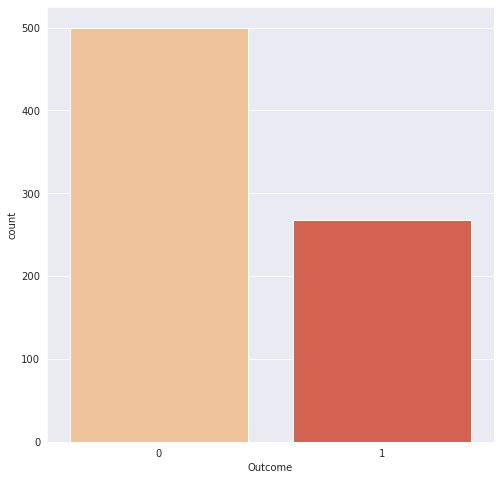

In [9]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,8))
sns.countplot(x = "Outcome", data = df, palette = 'OrRd')

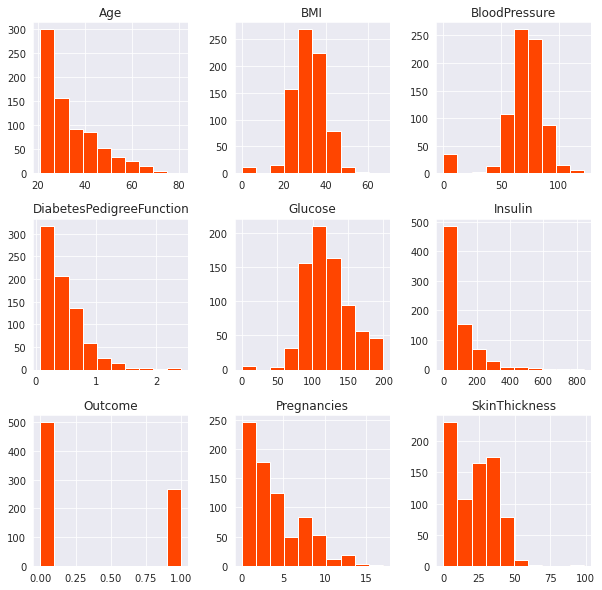

In [10]:
df.hist(figsize = (10,10), color = "Orangered")
plt.show()

#Plotting the df into histograms

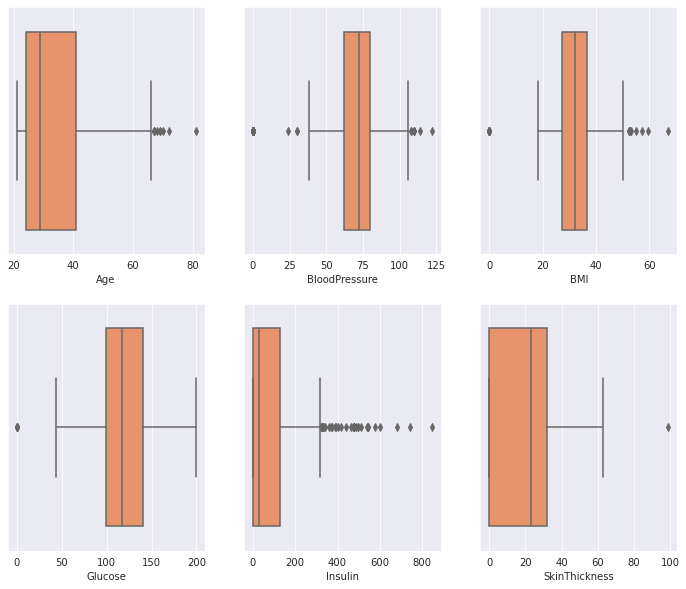

In [11]:
plt.figure(figsize = (12,10))
sns.set_style(style = 'darkgrid')
plt.subplot(2,3,1)
sns.boxplot(x = 'Age', data = df, palette = 'OrRd')
plt.subplot(2,3,2)
sns.boxplot(x = 'BloodPressure', data = df, palette = 'OrRd')
plt.subplot(2,3,3)
sns.boxplot(x = 'BMI', data = df, palette = 'OrRd')
plt.subplot(2,3,4)
sns.boxplot(x = 'Glucose', data = df, palette = 'OrRd')
plt.subplot(2,3,5)
sns.boxplot(x = 'Insulin', data = df, palette = 'OrRd')
plt.subplot(2,3,6)
sns.boxplot(x = 'SkinThickness', data = df, palette = 'OrRd')

#Creating a box plot from the top six mean data from df.decribe
#pedigree function and pregnancies were not relevant enough so they have been ommitted for now

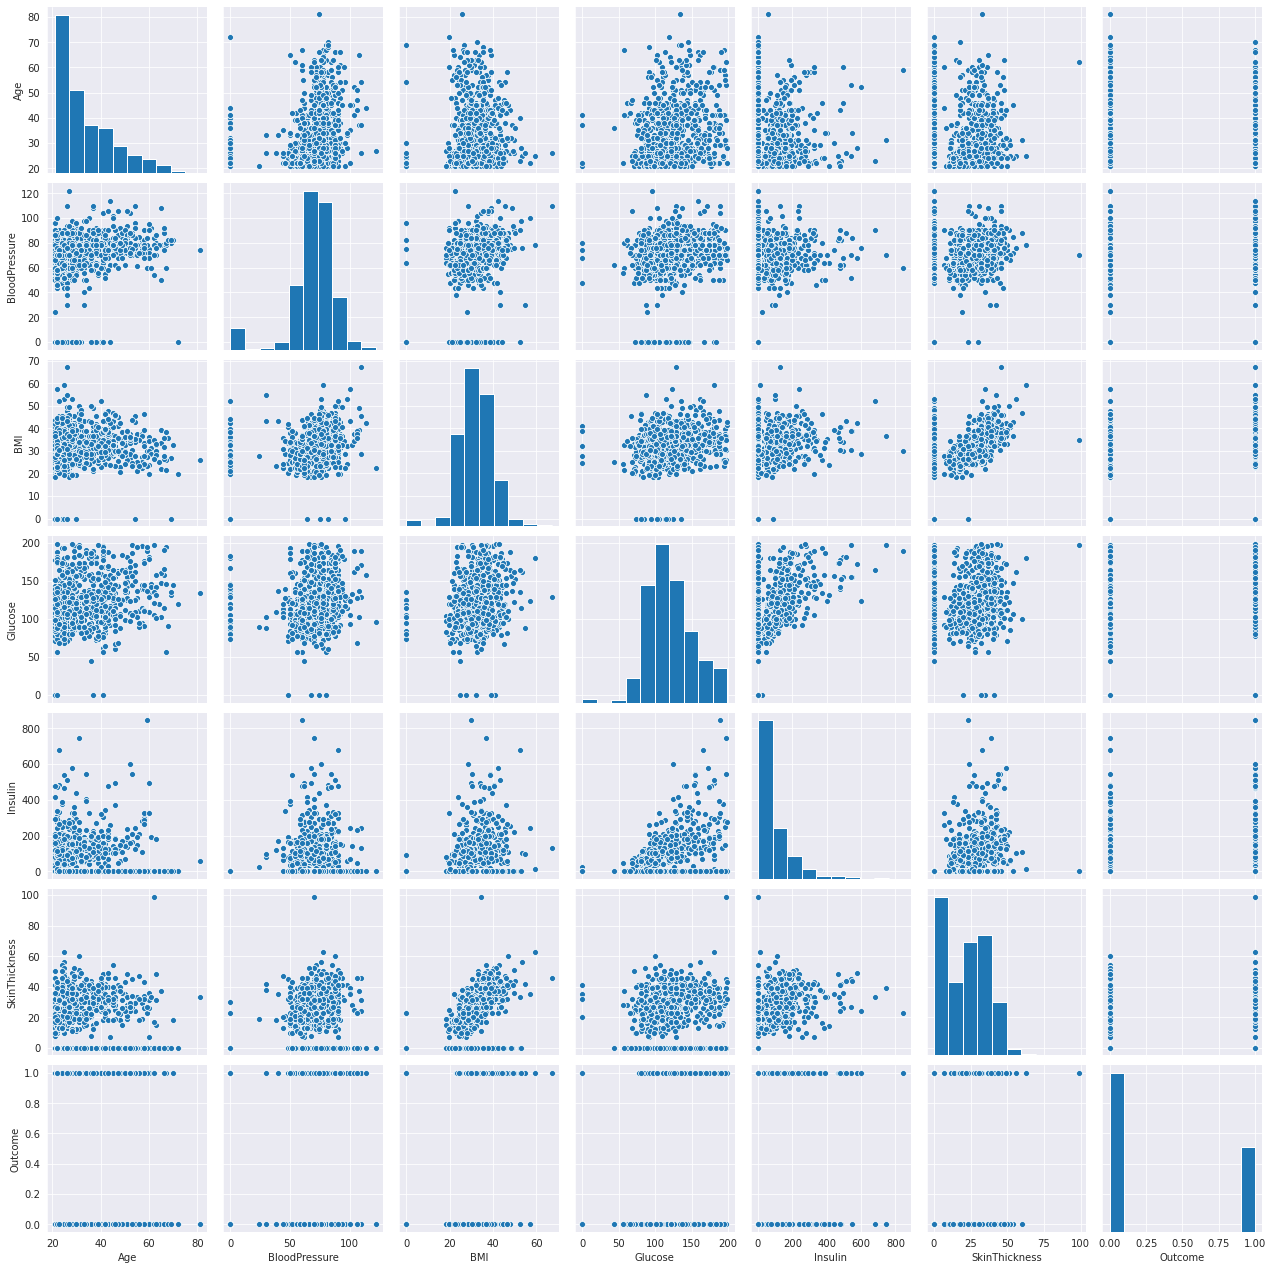

In [12]:
mean_col = ['Age', 'BloodPressure', 'BMI', 'Glucose', 'Insulin', 'SkinThickness', 'Outcome']
sns.pairplot(df[mean_col])

#creating a scatterplot to show the realtionship between the quantitative variables
#I have  also included outcome to show how each of the relevant variabels measure against the total diabetics and non-diabetics within the set

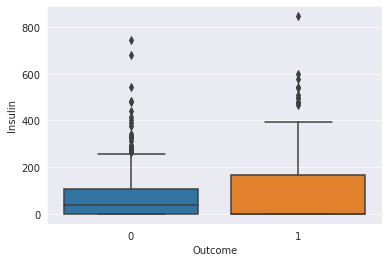

In [13]:
sns.boxplot(x = 'Outcome', y = 'Insulin', data = df)

#Showing the direct correlation between insulin and outcome
#As it seems so far, insulin levels are the greatest determiners of diabetes

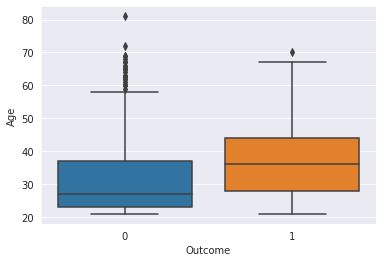

In [14]:
sns.boxplot(x = 'Outcome', y = 'Age', data = df)

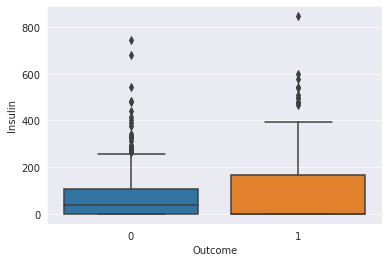

In [15]:
sns.boxplot(x = 'Outcome', y = 'Insulin', data = df)

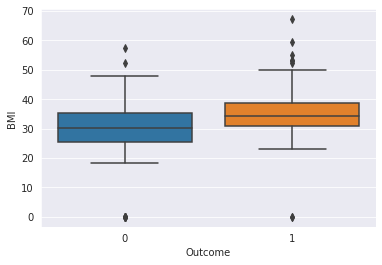

In [16]:
sns.boxplot(x = 'Outcome', y = 'BMI', data = df)

sns.boxplot(x = 'Outcome', y = 'BloodPressure', data = df)

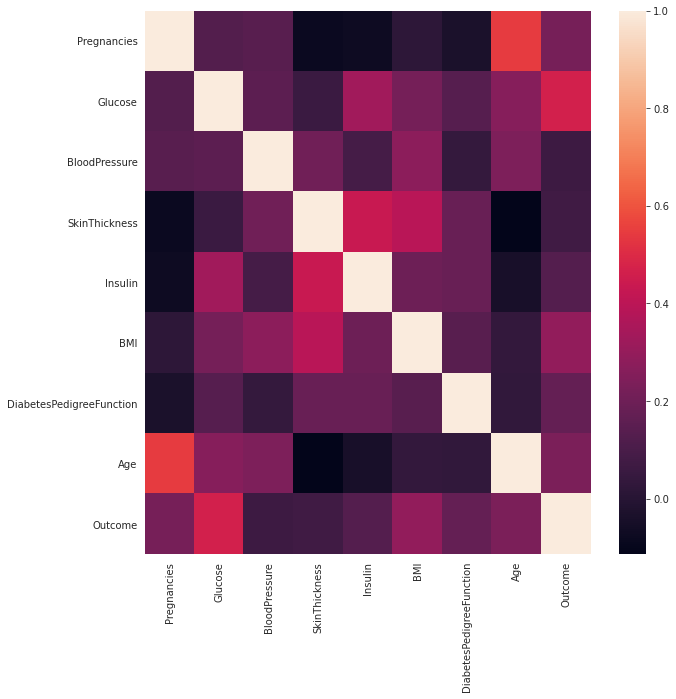

In [17]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr())

#Plotting the correlations on a heatmap

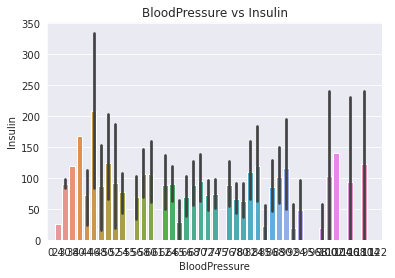

In [18]:
sns.barplot(x = "BloodPressure", y = "Insulin", data = df)
plt.title("BloodPressure vs Insulin", fontsize = 12)
plt.xlabel("BloodPressure")
plt.ylabel("Insulin")
plt.show()
plt.style.use("ggplot")

#Since there are too many values to see, in the next barplot I have chosen the data between 290 to 300 for plotting

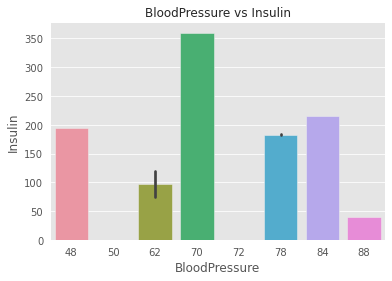

In [19]:
sns.barplot(x = "BloodPressure", y = "Insulin", data = df[290:300])
plt.title("BloodPressure vs Insulin", fontsize = 12)
plt.xlabel("BloodPressure")
plt.ylabel("Insulin")
plt.show()
plt.style.use("ggplot")

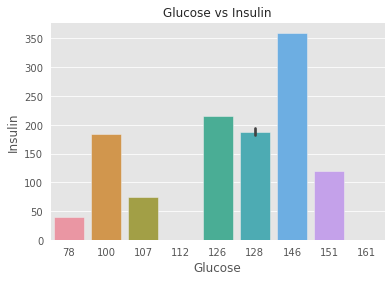

In [21]:
sns.barplot(x = "Glucose", y = "Insulin", data = df[290:300])
plt.title("Glucose vs Insulin", fontsize = 12)
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.show()
plt.style.use("ggplot")

#I have also chosen to compare glucose vs. insulin as it was a big factor in determining the outcome

In [23]:
#Train and Test data split

x = df.drop(columns = 'Outcome')

#Finding the predicted value, for the test and train I am splitting the data in a 70:30 ratio

y = df['Outcome']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [24]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

537
231
537
231


In [25]:
#Creating the logistic regression models based on the test and train split

from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
#Creating a confusion matrix to see the true positive and true negatives

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error

y_pred = reg.predict(x_test)
print("\nClassification Report is:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix is:\n", confusion_matrix(y_test, y_pred))
print("\nTraining Score is:\n", reg.score(x_train, y_train)*100)
print("\nR2 Score is:\n", r2_score(y_test, y_pred))
print("\nMean Squared Error is:\n", mean_squared_error(y_test, y_pred))

#Determining the accuracy score of LogReg

print("\nThe Accuracy Score is:\n", accuracy_score(y_test, y_pred)*100)


Classification Report is:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.71      0.53      0.60        74

    accuracy                           0.78       231
   macro avg       0.76      0.71      0.73       231
weighted avg       0.77      0.78      0.77       231


Confusion Matrix is:
 [[141  16]
 [ 35  39]]

Training Score is:
 76.35009310986965

R2 Score is:
 -0.014029953520399374

Mean Squared Error is:
 0.22077922077922077

The Accuracy Score is:
 77.92207792207793


In [27]:
#Creating a NB model to determine accuracy

from sklearn.naive_bayes import GaussianNB

df = GaussianNB()
df.fit(x_train, y_train)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error

y_pred = df.predict(x_test)
print("\nClassification Report is:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix is:\n", confusion_matrix(y_test, y_pred))
print("\nTraining Score is:\n", reg.score(x_train, y_train)*100)
print("\nR2 Score is:\n", r2_score(y_test, y_pred))
print("\nMean Squared Error is:\n", mean_squared_error(y_test, y_pred))

#Determining the accuracy score of NB

print("\nThe Accuracy Score is:\n", accuracy_score(y_test, y_pred)*100)



Classification Report is:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       157
           1       0.67      0.51      0.58        74

    accuracy                           0.76       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.75      0.76      0.75       231


Confusion Matrix is:
 [[138  19]
 [ 36  38]]

Training Score is:
 76.35009310986965

R2 Score is:
 -0.09356171458082296

Mean Squared Error is:
 0.23809523809523808

The Accuracy Score is:
 76.19047619047619


In [28]:
#Creating a Random Forest Classifier 

from sklearn.ensemble import RandomForestClassifier
df = RandomForestClassifier()
df.fit(x_train, y_train)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error

y_pred = df.predict(x_test)
print("\nClassification Report is:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix is:\n", confusion_matrix(y_test, y_pred))
print("\nTraining Score is:\n", reg.score(x_train, y_train)*100)
print("\nR2 Score is:\n", r2_score(y_test, y_pred))
print("\nMean Squared Error is:\n", mean_squared_error(y_test, y_pred))

#Determining the accuracy score of NB

print("\nThe Accuracy Score is:\n", accuracy_score(y_test, y_pred)*100)


Classification Report is:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       157
           1       0.69      0.54      0.61        74

    accuracy                           0.77       231
   macro avg       0.75      0.71      0.72       231
weighted avg       0.77      0.77      0.77       231


Confusion Matrix is:
 [[139  18]
 [ 34  40]]

Training Score is:
 76.35009310986965

R2 Score is:
 -0.03391289378550533

Mean Squared Error is:
 0.22510822510822512

The Accuracy Score is:
 77.48917748917748


In [ ]:
#For the final code I plan on making a visual decision tree, however, it is taking me a lot longer than expected. 
#So that will be included in the final part of the project